# 1. Clustering (25 points)

Consider a dataset consisting of 6 data points $A,B,C,D,E,F$ as shown in Figure 1. The pair next to each point shows the x and y coordinates of each data point. We wish to group the datapoints into k clusters according to the K-means criterion, and using the `k-means++` algorithm (Arthur and Vassilvitskii, 2007).

![image.png](docs/images/figure1.png)

Figure 1: Dataset for Question 1

1. Consider $k = 1$. What is the cluster center? (I.e., what is the centroid of the entire dataset?)
Now consider $k = 3$. We would like to study how k-means++ performs clustering on this dataset.
2. How does the algorithm choose the first initial cluster center $c_1$? (In other words, determine the probability of each data point being chosen as $c_1$).
3. Conditioned on A being chosen as $c_1$, how does the algorithm choose $c_2$?
4. Conditioned on $c_2 = F$ and $c_1 = A$, how does the algorithm choose $c_3$?
5. (Optional) Suppose that the algorithm chooses $c_3 = B$ - hence, $c_1 = A, c_2 = F, c_3 = B$. Assume we stop here. Determine the clustering $C$ based on the cluster centers $c_1, c_2, c_3$ and compute the corresponding cost $\phi$.
_Recall that for the K-means problem, the cost_ $\phi$ _of a dataset $X$ and a set of cluster centers_ $\mathcal{C} = \{c_1, ..., c_k\}$ _is_
$$\phi(X, C) = \sum_{x\in\mathcal{X}} \min_{c\in\mathcal{C}} \|x-c\|_2^2$$
6. Suppose that the `k-means++` algorithm chooses $c_3 = B$  - hence, $c_1 = A, c_2 = F, c_3 = B$. Determine the final clustering $C$ returned by `k-means++` based on the cluster centers $c_1, c_2, c_3$. Also argue how you determined that the algorithm has converged.

Deliverables: Report all necessary computations in tasks above.

## Transcript

Consider a dataset consisting of 6 data points $A,B,C,D,E,F$ as shown in Figure 1. The pair next to each point shows the $x$ and $y$ coordinates of each data point. We wish to group the datapoints into $k$ clusters according to the K-means criterion, and using the `k-means++` algorithm (Arthur and Vassilvitskii, 2007).

From the figure I can see
Point A: (7, 0)
Point B: (2, 0)
Point C: (0, -2)
Point D: (0, 2)
Point E: (-6, -2)
Point F: (-6, 2)

1. Consider $k = 1$. What is the cluster center? (I.e., what is the centroid of the entire dataset?)
Now consider $k = 3$. We would like to study how `k-means++` performs clustering on this dataset.
2. How does the algorithm choose the first initial cluster center $c_1$? (In other words, determine the probability of each data point being chosen as $c_1$).
3. Conditioned on A being chosen as $c_1$, how does the algorithm choose $c_2$?
4. Conditioned on $c_2 = F$ and $c_1 = A$, how does the algorithm choose $c_3$?
5. (Optional) Suppose that the algorithm chooses $c_3 = B$ - hence, $c_1 = A, c_2 = F, c_3 = B$. Assume we stop here. Determine the clustering $C$ based on the cluster centers $c_1, c_2, c_3$ and compute the corresponding cost $\phi$.
_Recall that for the K-means problem, the cost_ $\phi$ _of a dataset $X$ and a set of cluster centers_ $\mathcal{C} = \{c_1, ..., c_k\}$ _is_
$$\phi(X, C) = \sum_{x\in\mathcal{X}} \min_{c\in\mathcal{C}} \|x-c\|_2^2$$
6. Suppose that the `k-means++` algorithm chooses $c_3 = B$  - hence, $c_1 = A, c_2 = F, c_3 = B$. Determine the final clustering $C$ returned by `k-means++` based on the cluster centers $c_1, c_2, c_3$. Also argue how you determined that the algorithm has converged.

Deliverables: Report all necessary computations in tasks above.

Theory:
k-means++

Given a set B, define:
$$
D(x,B) := \min_{z\in B} \|x-z\|
$$

Algorithm:

Input: $\mathcal{X}$

Initialization: Choose $c_1$ uniformly at random from $\mathcal{X}$

for $i = 2, ..., k$
- Take $c_i$, by sampling $x$ with probability:
$$
\frac{D(x, \{c_1, ..., c_{i-1}\})^2}{\sum_{y\in\mathcal{X}} D(y, \{c_1, ..., c_{i-1}\})^2}
$$
k-means step: Run k-means using the initial centers $c_1, ..., c_k$

In [47]:
import numpy as np
from tabulate import tabulate

def kmeans(data, initial_centroids):
    centroids = np.array([data[point] for point in initial_centroids])
    prev_centroids = np.zeros(centroids.shape)
    clusters = {i: [] for i in range(len(centroids))}
    iteration = 1
    
    # Continue until centroids don't change
    while not np.array_equal(centroids, prev_centroids):
        print(f"Iteration {iteration}:")
        clusters = {i: [] for i in range(len(centroids))}
        table_data = []  # Initialize the table_data list

        # Assignment step
        for point_name, point_coords in data.items():
            distances = np.linalg.norm(point_coords - centroids, axis=1)
            print(f"Distances for {point_name}: {distances}")
            cluster_index = np.argmin(distances)
            print(f"{point_name} assigned to cluster c{cluster_index+1}")
            clusters[cluster_index].append(point_name)
            table_data.append([point_name] + list(distances))
        
        # Inside the assignment step
        for point_name, point_coords in data.items():
            distances = np.linalg.norm(point_coords - centroids, axis=1)
            print(f"Distances for {point_name}: {distances}")
            cluster_index = np.argmin(distances)
            print(f"{point_name} assigned to cluster c{cluster_index+1}")
            clusters[cluster_index].append(point_name)

        # Inside the update step
        prev_centroids = centroids.copy()
        for i, point_names in clusters.items():
            if point_names:
                new_centroid = np.mean([data[pn] for pn in point_names], axis=0)
                print(f"Updated centroid for c{i+1}: {new_centroid}")
                centroids[i] = new_centroid
    
        
        headers = ["Point"] + [f"c{i+1}" for i in range(len(centroids))]
        print(tabulate(table_data, headers=headers, floatfmt=".4f"))
        
        for i, point_names in clusters.items():
            print(f"Cluster c{i+1}: {point_names}")
        
        iteration += 1
    
    return clusters, centroids

# Data points
data = {
    'A': np.array([7, 0]),
    'B': np.array([2, 0]),
    'C': np.array([0, -2]),
    'D': np.array([0, 2]),
    'E': np.array([-6, -2]),
    'F': np.array([-6, 2])
}

# Initial centroids
initial_centroids = ['A', 'F', 'B']

clusters, final_centroids = kmeans(data, initial_centroids)

# Display final results
print("Final Results:")
for i, point_names in clusters.items():
    print(f"Cluster c{i+1}: {point_names}")
print(f"Final centroids: {final_centroids}")


Iteration 1:
Distances for A: [ 0.         13.15294644  5.        ]
A assigned to cluster c1
Distances for B: [5.         8.24621125 0.        ]
B assigned to cluster c3
Distances for C: [7.28010989 7.21110255 2.82842712]
C assigned to cluster c3
Distances for D: [7.28010989 6.         2.82842712]
D assigned to cluster c3
Distances for E: [13.15294644  4.          8.24621125]
E assigned to cluster c2
Distances for F: [13.15294644  0.          8.24621125]
F assigned to cluster c2
Distances for A: [ 0.         13.15294644  5.        ]
A assigned to cluster c1
Distances for B: [5.         8.24621125 0.        ]
B assigned to cluster c3
Distances for C: [7.28010989 7.21110255 2.82842712]
C assigned to cluster c3
Distances for D: [7.28010989 6.         2.82842712]
D assigned to cluster c3
Distances for E: [13.15294644  4.          8.24621125]
E assigned to cluster c2
Distances for F: [13.15294644  0.          8.24621125]
F assigned to cluster c2
Updated centroid for c1: [7. 0.]
Updated cent

# 2. Sleep Well Revisited (25 points)

Sleep is one of the most fundamental physiological processes, and abnormal sleeping patterns are associated with poor health. They may, for example, indicate brain- & heart diseases, obesity and diabetes. During sleep our brain goes through a series of changes between different _sleep stages_, which are characterized by specific brain and body activity patterns. _Sleep staging_ refers to the process of mapping these transitions over a night of sleep. This is of fundamental importance in sleep medicine, because the sleep patterns combined with other variables provide the basis for diagnosing many sleep related disorders (Kales and Rechtschaffen, 1968, Iber and AASM, 2007). The stages can be determined by measuring the neuronal activity in the cerebral cortex (via electroencephalography, EEG), eye movements (via electrooculography, EOG), and/or the activity of facial muscles (via electromyography, EMG) in a _polysomnography_ (PSG) study. The classification into stages is done manually. This is a difficult and time-consuming process, in which expert clinicians inspect and segment the typically 8–24 hours long multi-channel signals. Contiguous, fixed-length intervals of 30 seconds are considered, and each of these _segments_ is classified individually. Algorithmic sleep staging aims at automating this process. The state-of-the-art in algorithmic sleep staging is marked by deep neural networks, which can be highly accurate and robust, even compared to human performance, see the recent work by Perslev et al. (2019) and references therein.

This assignment considers algorithmic sleep staging. The data is based on a single EEG channel from the Sleep-EDF-15 data set (Kemp et al., 2000, Goldberger et al., 2000). The input is given by an intermediate representation from the U-Time neural network architecture (Perslev et al., 2019), the targets are sleep stages. We created a training and test set, the inputs and the corresponding labels can be found in `X train.csv` and `y_train.csv` and `X_test.csv` and `y_test.csv`, respectively. Download and extract the data from https://github.com/christian-igel/ML/blob/main/data/Sleep-EDF-15_U-Time/.

### Introduction

The Sleep-EDF database comprises 197 polysomnographic sleep recordings, capturing EEG, EOG, chin EMG, and event markers, with some records also including respiration and body temperature. These recordings are paired with manually scored hypnograms, which classify sleep into various stages. The data originates from two primary studies:

1. **Sleep Cassette Study**: Conducted between 1987-1991, this study assessed age-related sleep effects in healthy Caucasians using a cassette-tape recorder. It contributed 153 files labeled as SC*.

2. **Sleep Telemetry Study**: In 1994, this study examined the effects of temazepam on sleep in 22 Caucasians. Recordings were taken in a hospital over two nights, resulting in 44 files labeled as ST*.

Both studies utilized the EDF and EDF+ formats, providing detailed headers about patient information, recording specifics, and signal characteristics.

## 2.1 Principal Component Analysis (PCA)

Perform a principal component analysis of the training data `X_train.csv`. Plot the eigenspectrum (see the plot on slide 28 of the _PCA_ slides for an example). How many components are necessary to "explain 90% of the variance"? Visualize the data by a scatter plot of the data projected on the first two principal components. Use different colors for the different classes in the plot.

Deliverables: description of software used; plot of the eigenspectrum; number of components necessary to explain 90% of variance; scatter plot of the data projected on the first two principal components with different colors indicating the 5 different classes

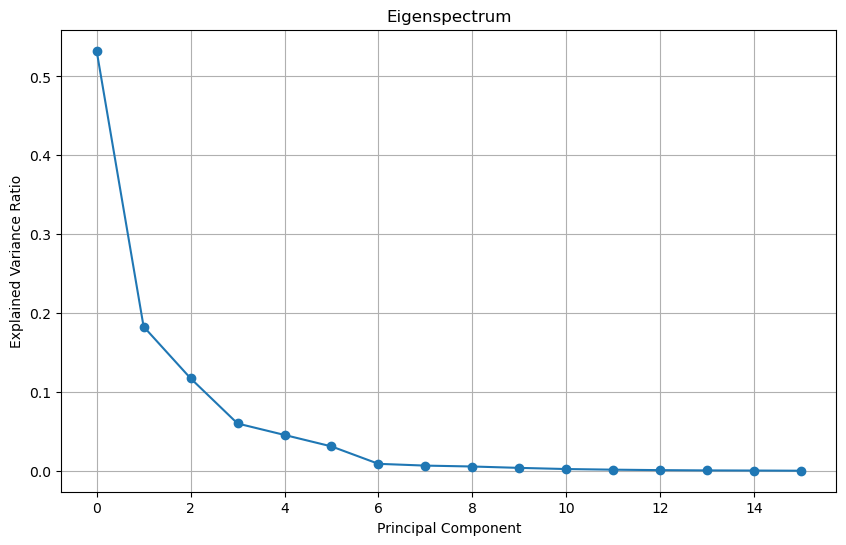

Number of components to explain 90% variance: 5


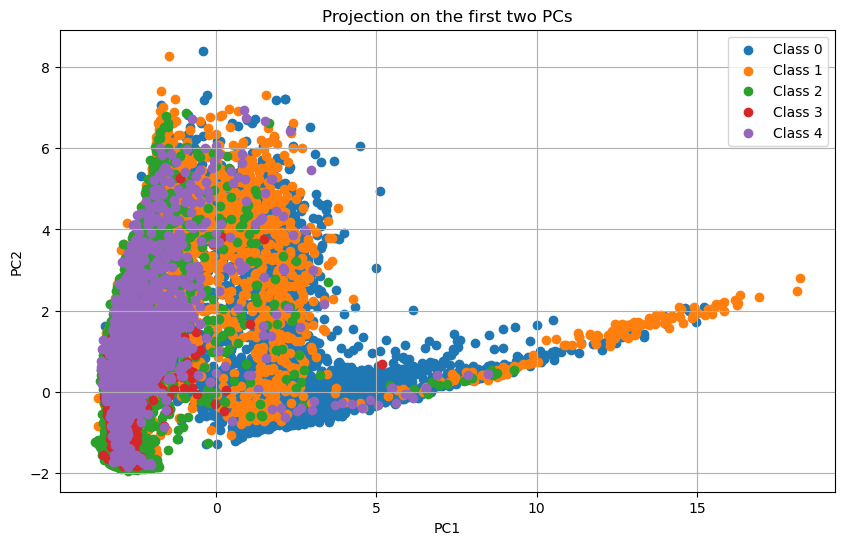

In [9]:
# Load the data
import pandas as pd

X_train = pd.read_csv("data/Sleep-EDF-15_U-Time/X_train.csv", header=None)
y_train = pd.read_csv("data/Sleep-EDF-15_U-Time/y_train.csv", header=None)

# Perform Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Plot the eigenspectrum
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(explained_var, 'o-')
plt.title('Eigenspectrum')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine the number of components necessary to explain 90% of the variance:
cumulative_var = explained_var.cumsum()
n_components_90 = (cumulative_var < 0.9).sum() + 1
print(f"Number of components to explain 90% variance: {n_components_90}")

# Visualize the data using a scatter plot of the first two principal components:
plt.figure(figsize=(10, 6))
for label in y_train[0].unique():
    plt.scatter(X_train_pca[y_train[0] == label, 0], 
                X_train_pca[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
plt.title('Projection on the first two PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

## 2.2 Clustering using $k$-means

Perform 5-means clustering of `X_train.csv`. After that, project the cluster centers to the first two principal components of the training data. Then visualize the clusters by adding the cluster centers to the plot from the previous exercise.

Briefly discuss the results. In this example, you do not get 5 nicely separated clusters in 2D. A better looking projection of the data can be achieved using a non-linear dimensionality reduction technique, for example _non-linear t-Distributed Stochastic Neighbor Embedding_ (t-SNE) (?). Although not part of the exam, we recommend that you try it out.

Deliverables: description of software used; one plot with cluster centers and data points; short discussion of results

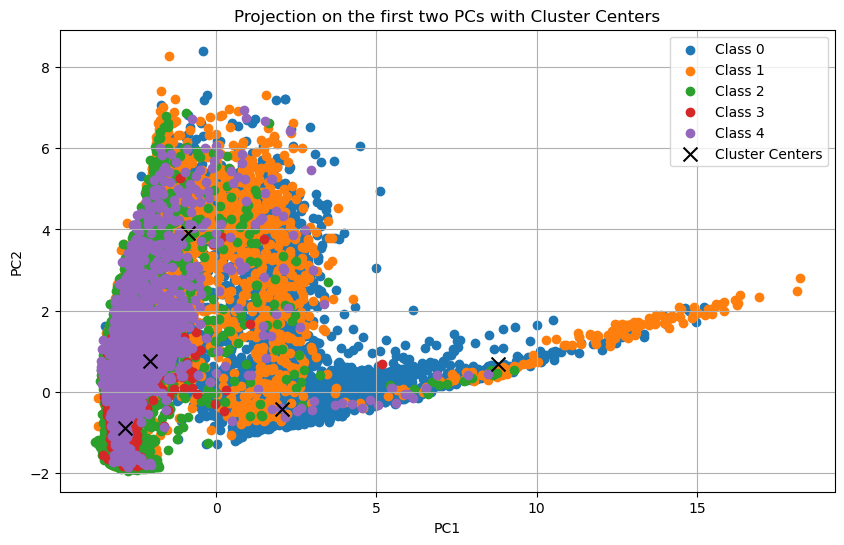

In [10]:
# Perform 5-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(X_train)
cluster_centers = kmeans.cluster_centers_

# Project the cluster centers to the first two principal components of the training data.
cluster_centers_pca = pca.transform(cluster_centers)

# Visualize the clusters by adding the cluster centers to the scatter plot from the previous exercise.
plt.figure(figsize=(10, 6))
for label in y_train[0].unique():
    plt.scatter(X_train_pca[y_train[0] == label, 0], 
                X_train_pca[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
            c='black', marker='x', s=100, label='Cluster Centers')
plt.title('Projection on the first two PCs with Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### Discussion:
The 5-means clustering attempts to find five distinct clusters in the data. When we project the data and the cluster centers onto the first two principal components, we might not see five clearly separated clusters. This is because PCA is a linear dimensionality reduction technique, and it might not capture the non-linear structures in the data.

As suggested, a non-linear dimensionality reduction technique like t-SNE could provide a better visualization of the clusters. t-SNE is particularly good for visualizing high-dimensional data in 2D or 3D. While PCA tries to preserve global structure (i.e., the relationships between various clusters), t-SNE tries to preserve local structure (i.e., the relationships between neighboring data points). This often results in more intuitive visualizations, especially for complex datasets.

### Deliverables:
Software Used: Python with libraries: pandas, matplotlib, scikit-learn.
Plot: The above code provides a scatter plot with data points and cluster centers.
Discussion: The brief discussion provided above.

If you'd like to try t-SNE, I can provide the code for that as well.

## Analysis of the data

In [11]:
# Statistical analysis of the clusters
import numpy as np

# Assign data points to clusters
labels = kmeans.predict(X_train)

# Calculate meaningful statistics for each cluster
clusters = []
for i in range(5):
    cluster_points = X_train[labels == i]
    num_points = cluster_points.shape[0]
    avg_distance = np.mean(np.linalg.norm(cluster_points - cluster_centers[i], axis=1))
    clusters.append([i, num_points, avg_distance])

# Create a DataFrame for the results
df_clusters = pd.DataFrame(clusters, columns=['Cluster', 'Number of Points', 'Average Distance to Center'])
print(df_clusters)

   Cluster  Number of Points  Average Distance to Center
0        0              9387                    1.656075
1        1             16658                    1.180427
2        2              3064                    2.575288
3        3              4164                    2.370704
4        4               451                    3.365201


Based on the provided table, here are some observations and interpretations:

1. **Cluster Sizes**:
   - Cluster 1 (0-indexed) is the largest with 16,658 data points, while Cluster 4 is the smallest with only 451 data points.
   - This indicates that the data points in Cluster 1 share more common characteristics, making them group together more densely. On the other hand, Cluster 4 represents a smaller, more distinct subset of the data.

2. **Distance to Cluster Centers**:
   - Cluster 4 has the highest average distance to its center, indicating that the data points in this cluster are more spread out. This could mean that this cluster represents a more diverse group of data points.
   - Cluster 1 has the smallest average distance to its center, suggesting that the data points in this cluster are more tightly packed around the center. This reinforces the idea that Cluster 1 represents a dense grouping of similar data points.
   - Clusters 2 and 3 have relatively high average distances as well, indicating some spread, but not as much as Cluster 4.

3. **Implications for the Data**:
   - The results suggest that there are clear groupings in the data, with some groups (like Cluster 1) being more prevalent and others (like Cluster 4) being more unique or distinct.
   - The spread in Cluster 4 might indicate a more heterogeneous group, possibly representing outliers or less common observations in the dataset.

4. **Relation to Sleep Staging**:
   - Given the context of sleep staging, the clusters could represent different stages of sleep or transitions between them. The larger clusters might represent more common or prolonged stages, while the smaller, more spread-out clusters could represent rarer or shorter stages.
   - The distinct nature of Cluster 4 might represent a specific sleep event or anomaly that occurs less frequently but is crucial for diagnosis.

5. **Recommendations**:
   - Further analysis could involve examining the characteristics of each cluster to determine what differentiates them. This could provide insights into the underlying sleep patterns or events.
   - It might also be beneficial to compare these clusters with the labeled sleep stages (if available) to see how well the clustering aligns with known sleep stages.

In summary, the clustering results provide a valuable overview of the data's structure, revealing both prevalent and rare patterns. This can serve as a foundation for more in-depth analysis and interpretation in the context of sleep staging.

### Characteristics of each cluster to determine what differentiates them
Certainly! To examine the characteristics of each cluster, we can look into the following:

1. **Cluster Centroids**: Analyze the values of the cluster centers. These centroids represent the "average" or "typical" data point for each cluster. By comparing the centroids, we can identify which features are more pronounced in each cluster.

2. **Feature Distribution**: For each cluster, we can visualize the distribution of features to understand the spread and central tendencies.

3. **Comparative Analysis**: Compare the clusters against each other using statistical tests to determine if the differences in their features are significant.

Let's start by examining the cluster centroids:

In [12]:
# Convert cluster centers to DataFrame for better visualization
df_centroids = pd.DataFrame(cluster_centers, columns=X_train.columns)
print(df_centroids)

         0         1         2         3         4         5         6   \
0 -0.108265 -0.359693 -0.592530 -0.177252 -0.614222 -0.539813 -0.492651   
1 -0.718018 -0.590154 -0.600860  1.417078  1.643433  0.461507 -0.543654   
2  1.158870 -0.582104  1.119827 -0.357817  0.428187  1.639186 -0.444915   
3 -0.149900  1.166205  0.439755 -0.545572 -0.579232 -0.567750  1.287054   
4 -0.299801 -0.452582 -0.577019  7.331787  3.248205  5.351404 -0.329622   

         7         8         9         10        11        12        13  \
0 -0.503542 -0.693756 -0.764299 -0.619891  0.075012 -0.460816  1.059006   
1 -0.467851  0.367630  1.275509 -0.183511 -0.762598  1.590772 -0.703463   
2  1.632680  1.458224 -0.000016  0.653833  1.564022  0.183203 -0.434998   
3 -0.111338 -0.136213 -0.048615  0.378796 -0.205495 -0.427367 -0.529175   
4 -0.434523  0.244846  3.204990  1.268539 -0.779854  4.469323 -0.487153   

         14        15  
0  0.856787 -0.565605  
1 -0.631646  0.472680  
2 -0.117480 -0.484884  
3 

This will give you a table where each row represents a cluster centroid, and the columns represent the features. By comparing the values, you can identify which features are more pronounced in each cluster.

Next, let's visualize the distribution of features for each cluster:

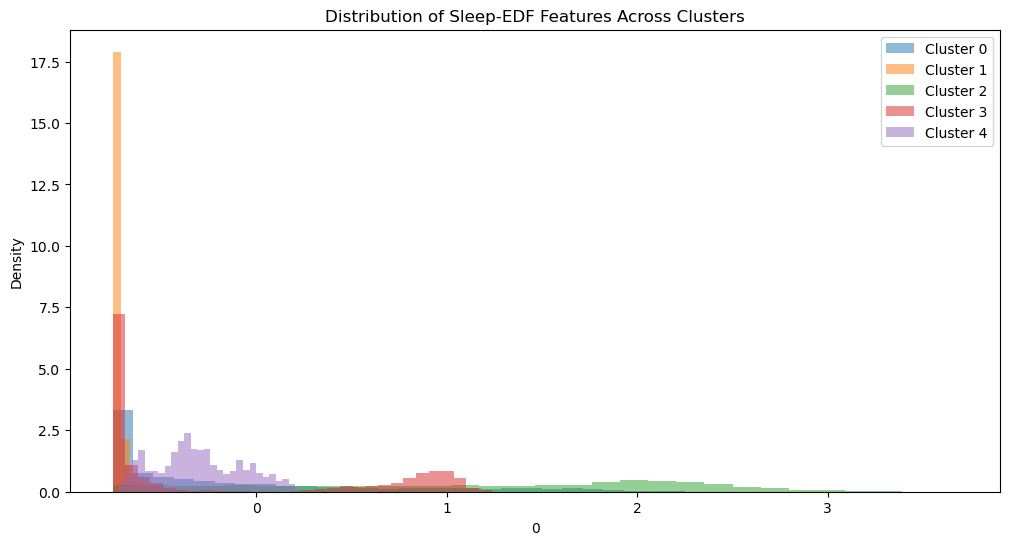

In [13]:
# Choose a feature to visualize (you can loop over features or choose specific ones)
feature_to_visualize = X_train.columns[0]  # for example, the first feature

plt.figure(figsize=(12, 6))
for i in range(5):
    data = X_train[labels == i][feature_to_visualize]
    plt.hist(data, bins=30, alpha=0.5, label=f"Cluster {i}", density=True) # density=True for normalized histograms

plt.title(f'Distribution of Sleep-EDF Features Across Clusters')
plt.xlabel(feature_to_visualize)
plt.ylabel('Density')
plt.legend()
plt.show()

x-axis: Represents the values of a specific feature or physiological signal from the Sleep-EDF database. Depending on the feature you're visualizing, this could be the amplitude of EEG, EOG, or EMG signals, specific sleep stages or events from event markers, or values of respiration rate or body temperature.

y-axis (Density): Represents the probability density of the data at different values on the x-axis. In simpler terms, it shows how often (or how densely packed) data points occur at each value on the x-axis.

For a histogram, when density=True is set, the area under the histogram integrates to 1. This means that the y-axis values are not raw counts of data points but are normalized such that the total area under the histogram (or the curve in the case of a KDE plot) equals 1. This normalization allows for a meaningful comparison of distributions across different clusters, especially if they have different numbers of data points.

In essence:
The x-axis tells you "what value" the feature has.
The y-axis (density) tells you "how often" that value appears in the data, relative to other values, for a specific cluster.

### t-SNE

In [14]:
# Apply t-SNE to X_train.csv
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)

# Visualize the t-SNE results
plt.figure(figsize=(10, 6))
for label in y_train[0].unique():
    plt.scatter(X_train_tsne[y_train[0] == label, 0], 
                X_train_tsne[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

t-SNE is a non-linear dimensionality reduction technique that is particularly good at preserving local structure, making it useful for visualizing clusters in high-dimensional data. The resulting plot will show how the data points are grouped in a 2D space according to t-SNE.

Note: t-SNE can be computationally intensive, especially for large datasets. The results can also vary between runs unless the random_state is fixed, as t-SNE is a stochastic algorithm.

## 2.3 Clustering using $k$-means++

Repeat the last part using 5-means++ and compare the resulting clusters with the ones obtained with regular 5-means. Are the clusters similar or different, and why? Provide argumentation, considering factors like the initialization of cluster centers, convergence behavior, and the impact on the clustering results.

Deliverables: description of software used; one plot with cluster centers and data points; discussion of results and discussion on comparison